## Manipular dados numéricos para algoritmos de Machine Learning. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

[palmerpenguins-dataset](https://allisonhorst.github.io/palmerpenguins/)

In [2]:
caminho_csv = 'penguins.csv'
df_penguins = pd.read_csv(caminho_csv)

print(df_penguins.isnull().sum())
df_penguins = df_penguins.dropna()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


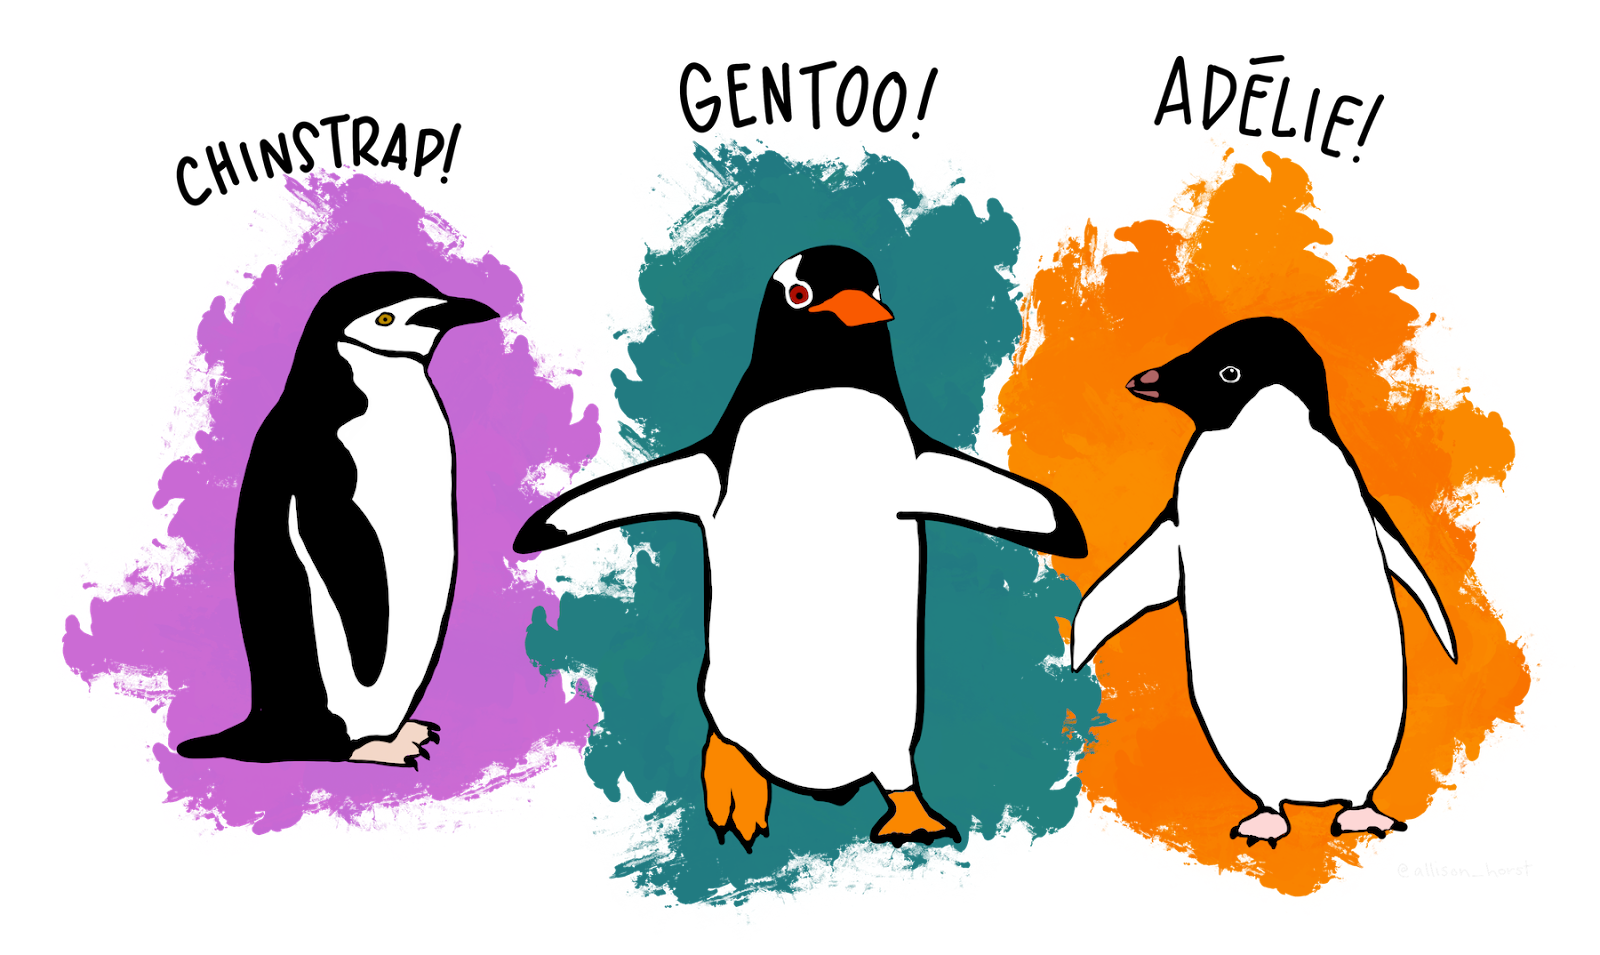

### Lista de exercícios:

### Exercício 1: Compreensão de Features no Dataset Palmer Penguins

Examine o dataset Palmer Penguins e explique o que são 'features' no contexto deste dataset específico. Discuta como as features influenciam o desempenho de um modelo de Machine Learning.

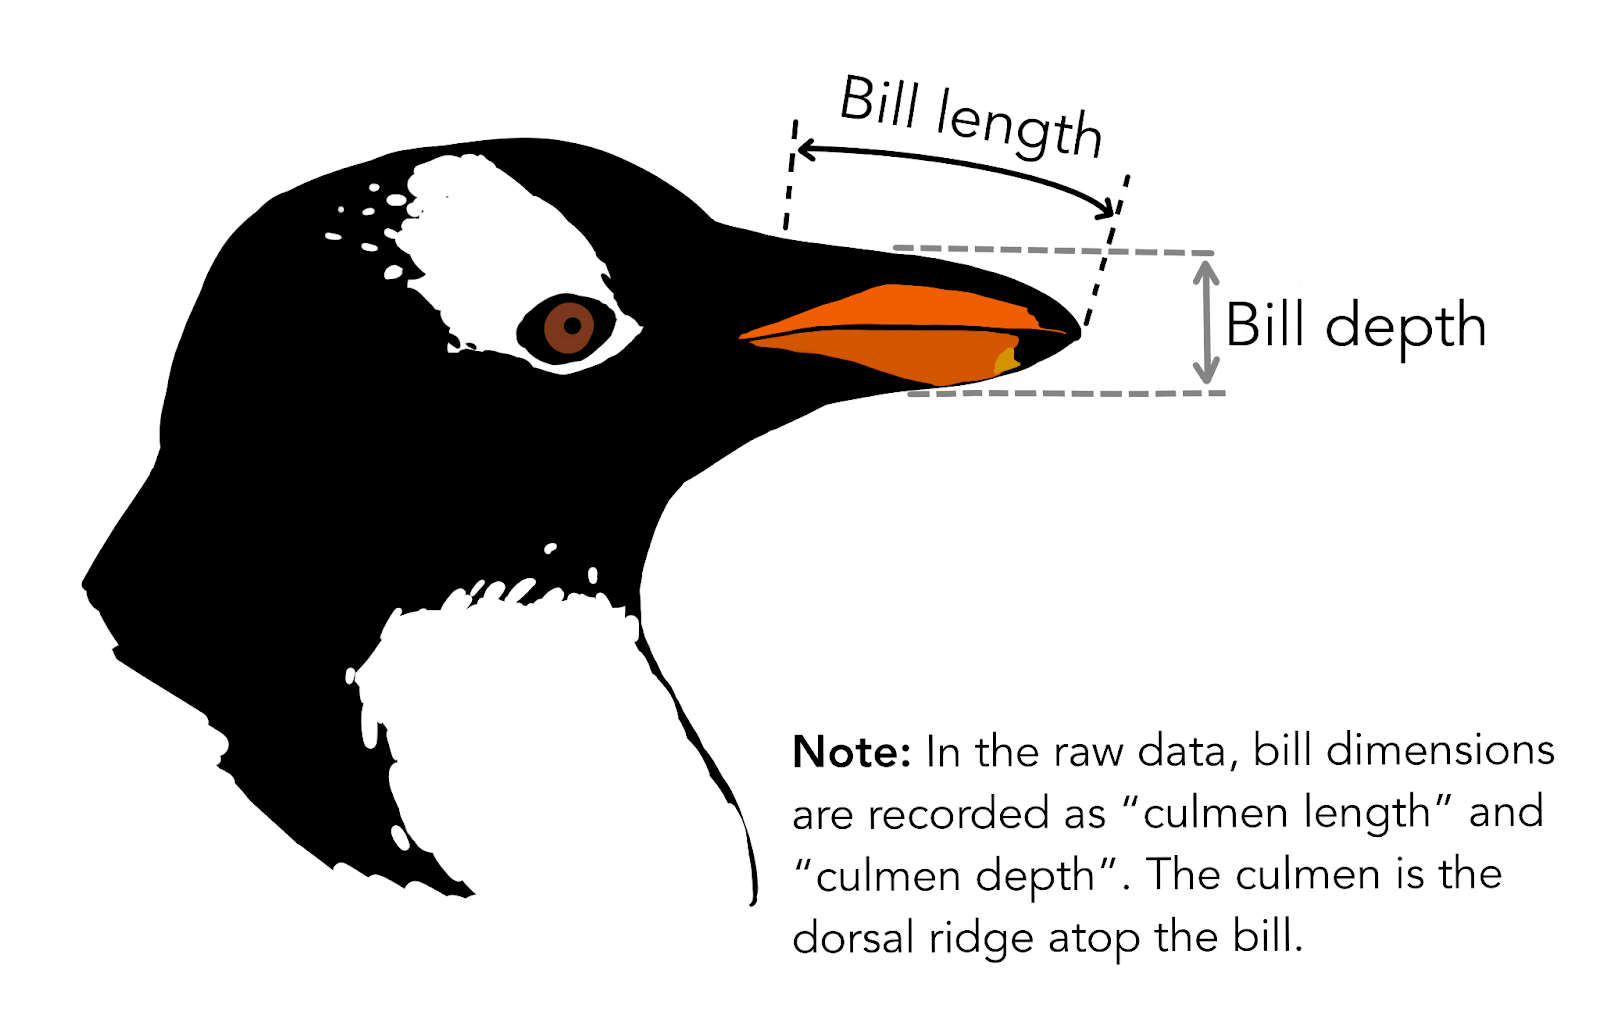

**R=** _O dataset Palmer Penguins contém informações sobre três espécies de pinguins. 
As features, se o objetivo for descobrir de qual especie cada pinguim pertece, 
são o comprimento e profundidade do bico (bill_length_mm, bill_depth_mm), 
comprimentoda nadadeira (flipper_length_mm), massa corporal (body_mass_g), sexo, ilha de origem e o ano._ <br>
 _Em um modelo de Machine Learning, features são os atributos mensuráveis usados
para descrever cada instância, e impactam diretamente no desempenho e na precisão
dos modelos, pois fornecer os indicativos necessários para uma tarefa a ser realizada,
por isso a qualidade, relevância e o tratamento adequado dessas features são
fundamentais no desenvolvimento de modelos de aprendizado de máquina._


### Exercício 2: Escalares, Vetores e Espaços em Machine Learning

Com base nos dados do dataset Palmer Penguins, identifique exemplos de escalares, vetores e explique o conceito de espaços em Machine Learning.

**R=** *Um escalar é um valor numérico individual, como, por exemplo, a massa corporal de um pinguim igual a 3800 gramas ou o ano de coleta 2007 presentes no dataset Palmer Penguins.*<br>

*Um vetor é um conjunto ordenado de escalares que representa uma instância do dataset. Por exemplo, um vetor pode representar características físicas do bico de um pinguim por meio das features bill_length_mm e bill_depth_mm, formando um vetor bidimensional.*<br>

*O espaço vetorial é o ambiente matemático no qual esses vetores estão inseridos, em que cada dimensão corresponde a uma feature do conjunto de dados. Em Machine Learning, esse espaço permite que os modelos realizem operações como cálculo de distâncias, medidas de similaridade e identificação de padrões. Dependendo do algoritmo utilizado, os dados podem ser analisados em diferentes tipos de espaços, como espaços métricos ou normados, nos quais propriedades matemáticas específicas são bem definidas.*

### Exercício 3: Discretização com Bins Fixos no Dataset Palmer Penguins

Utilize a técnica de quantização com bins fixos para discretizar uma variável contínua do dataset Palmer Penguins. Explique a razão pela qual você escolheu essa variável e como a discretização pode afetar a análise.

In [3]:
bins = [0, 3500, 4500, float('inf')]
labels = ['leve', 'médio', 'pesado']

df_penguins['massa_discretizada'] = pd.cut(
    df_penguins['body_mass_g'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print(df_penguins[['body_mass_g', 'massa_discretizada']].head())


   body_mass_g massa_discretizada
0       3750.0              médio
1       3800.0              médio
2       3250.0               leve
4       3450.0               leve
5       3650.0              médio


**R=** *Foi utilizada a técnica de discretização com bins fixos na variável contínua body_mass_g, que representa a massa corporal dos pinguins. Essa variável apresenta uma ampla variação de valores, o que a torna adequada para esse tipo de transformação.*

*A discretização converte a variável contínua em uma variável categórica, dividindo os dados em três faixas de peso: leve, médio e pesado. Esse processo reduz a granularidade dos dados, facilitando a visualização de padrões e podendo simplificar alguns modelos de Machine Learning, especialmente aqueles que lidam melhor com atributos categóricos. No entanto, essa simplificação pode implicar em perda de informação detalhada.*

### Exercício 4: Discretização com Bins Variáveis no Dataset Palmer Penguins

Aplique a técnica de quantização com bins variáveis em uma variável contínua do dataset Palmer Penguins. Compare os resultados com a discretização feita no exercício anterior.

In [4]:
# Discretização com Bins Variáveis (Quantização)
df_penguins['bill_length_bin'] = pd.qcut(
    df_penguins['bill_length_mm'],
    q=3,
    labels=['curto', 'médio', 'longo']
)


**R=** *Foi aplicada a técnica de discretização com bins variáveis (quantização) na variável contínua bill_length_mm do dataset Palmer Penguins. Diferentemente da discretização com bins fixos, na qual os limites dos intervalos são definidos manualmente, a discretização com bins variáveis divide os dados em faixas que contêm aproximadamente o mesmo número de amostras.*

*Essa abordagem garante um melhor equilíbrio entre as categorias criadas, o que pode ser vantajoso para alguns algoritmos de Machine Learning. Em comparação com o exercício anterior, observa-se que os bins variáveis produzem classes mais balanceadas, enquanto os bins fixos podem gerar faixas com quantidades muito diferentes de observações. Por outro lado, os limites dos bins variáveis dependem da distribuição dos dados e podem não possuir significado semântico claro, o que pode dificultar a interpretação dos resultados.*

### Exercício 6: Aplicação de PowerTransformer no Dataset Palmer Penguins

Utilize a PowerTransformer do Scikit-Learn para transformar uma variável do dataset Palmer Penguins. Discuta os benefícios dessa transformação.

In [5]:
# Uso do PowerTransformer com método Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson', standardize=True)

df_penguins['bill_depth_transformada'] = pt.fit_transform(
    df_penguins[['bill_depth_mm']]
)

print(df_penguins[['bill_depth_mm', 'bill_depth_transformada']].head())


   bill_depth_mm  bill_depth_transformada
0           18.7                 0.772741
1           17.4                 0.090955
2           18.0                 0.402485
4           19.3                 1.095848
5           20.6                 1.813755


**R=** *O PowerTransformer do Scikit-Learn foi aplicado à variável contínua bill_depth_mm com o objetivo de tornar sua distribuição mais próxima da normal e estabilizar a variância. Essa transformação melhora a estabilidade numérica dos dados e reduz a influência de assimetrias e outliers.*

*A normalização da distribuição é especialmente benéfica para modelos de Machine Learning que assumem relações lineares ou que são sensíveis à escala e à magnitude das variáveis, como regressão linear, regressão logística e máquinas de vetores de suporte. Ao aplicar o PowerTransformer, essas variáveis passam a contribuir de forma mais equilibrada para o treinamento do modelo, o que pode resultar em melhor desempenho e convergência mais estável.*

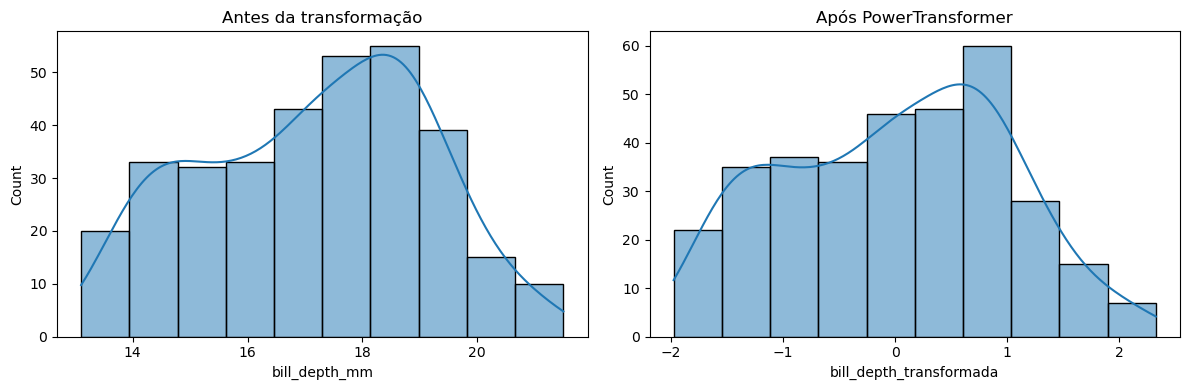

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_penguins['bill_depth_mm'].dropna(), ax=axes[0], kde=True)
axes[0].set_title('Antes da transformação')

sns.histplot(df_penguins['bill_depth_transformada'].dropna(), ax=axes[1], kde=True)
axes[1].set_title('Após PowerTransformer')

plt.tight_layout()
plt.show()

### Exercício 7: Normalização Min-Max no Dataset Palmer Penguins

Aplique a normalização Min-Max do Scikit-Learn em uma ou mais variáveis do dataset Palmer Penguins. Explique como essa normalização impacta o modelo de Machine Learning.

In [7]:
# Normalização Min-Max
scaler = MinMaxScaler()

df_penguins['flipper_normalizado_minmax'] = scaler.fit_transform(
    df_penguins[['flipper_length_mm']]
)

print(df_penguins[['flipper_length_mm', 'flipper_normalizado_minmax']].head())

   flipper_length_mm  flipper_normalizado_minmax
0              181.0                    0.152542
1              186.0                    0.237288
2              195.0                    0.389831
4              193.0                    0.355932
5              190.0                    0.305085


**R=** *A normalização utilizando o MinMaxScaler reescala os valores das variáveis para um intervalo fixo, geralmente entre 0 e 1, sem alterar a forma da distribuição original dos dados. Essa técnica preserva as relações relativas entre os valores, apenas modificando sua escala.*

*Essa normalização é especialmente importante para modelos de Machine Learning sensíveis ao escalonamento das variáveis, como algoritmos baseados em distância e gradiente, pois garante que todas as features contribuam de forma equilibrada para o treinamento do modelo. Ao equalizar a magnitude das variáveis, evita-se que atributos com valores maiores dominem o processo de aprendizagem, resultando em melhor estabilidade e desempenho do modelo.*

### Exercício 8: Normalização com Standard Scaler no Dataset Palmer Penguins

Utilize o StandardScaler do Scikit-Learn para normalizar variáveis do dataset Palmer Penguins. Discuta a diferença entre esta técnica e a normalização Min-Max.

In [8]:
# Uso do StandardScaler
scaler = StandardScaler()

df_penguins['flipper_normalizado_standard'] = scaler.fit_transform(
    df_penguins[['flipper_length_mm']]
)

print(df_penguins[['flipper_length_mm', 'flipper_normalizado_standard']].head())

   flipper_length_mm  flipper_normalizado_standard
0              181.0                     -1.426752
1              186.0                     -1.069474
2              195.0                     -0.426373
4              193.0                     -0.569284
5              190.0                     -0.783651


**R=** *O StandardScaler normaliza os dados por meio da centralização na média zero e do escalonamento para variância unitária, o que contribui para a estabilidade e eficiência do treinamento de diversos modelos de Machine Learning. Diferentemente do MinMaxScaler, que reescala os valores para um intervalo fixo, o StandardScaler não impõe limites mínimos ou máximos aos dados transformados.*

*Essa técnica preserva valores extremos (outliers) e é indicada quando os dados precisam ser padronizados para que todas as variáveis tenham a mesma importância estatística. Em comparação com a normalização Min-Max, o StandardScaler é mais adequado para modelos que assumem distribuições aproximadamente normais ou que utilizam métodos baseados em gradiente, como regressão linear, regressão logística e máquinas de vetores de suporte.*

### Exercício 9: Regularização Norma-L2 no Dataset Palmer Penguins

Implemente um modelo de regressão linear com regularização norma-L2 utilizando o dataset Palmer Penguins. 

In [9]:
features = ['bill_length_mm', 'bill_depth_transformada', 'flipper_normalizado_standard']

X = df_penguins[features]
y = df_penguins['body_mass_g']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo de regressão linear com regularização L2
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Resultados
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) * 100

print(f"Média dos erros quadráticos (MSE): {mse:.2f}")
print(f"Qualidade do ajuste (R²): {r2:.2f}%")


Média dos erros quadráticos (MSE): 143153.20
Qualidade do ajuste (R²): 76.06%
